D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


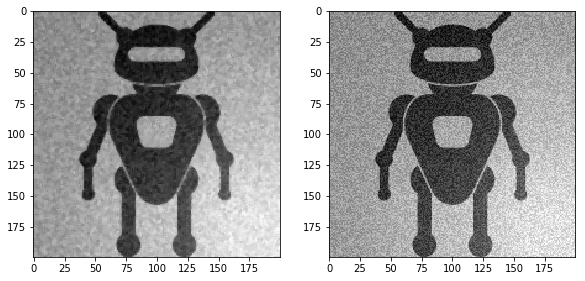

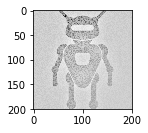

In [39]:
#Task:Filter image from salt and pepper
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy.ndimage as spimg
import math


z1 = img.imread('./1.png')
fig = plt.figure(figsize=(15, 10))
fz1 = spimg.median_filter(z1,size = 3)
gflt = spimg.gaussian_filter(z1, sigma = 10)

maxValue = (z1 - gflt).max()
minValue = (z1 - gflt).min()
diff = np.log2(z1) - np.log2(gflt)
lightcorrect = (diff-minValue)/(maxValue-minValue)

plt.subplot(131)
plt.imshow(fz1, cmap='gray')
plt.subplot(132)
plt.imshow(z1, cmap='gray')
plt.show()
plt.subplot(133)
plt.imshow(lightcorrect, cmap='gray')
plt.show()


In [34]:
import glob
import cv2

def read_images_in_folder():
    image_stack = []
    for img in glob.glob('/data2/Arms/*.png'): # All jpeg images
        image_stack.append(cv2.imread(img))
    return image_stack

def resize_image(image_stack): # Image resizing is performed here
    im_resized_stack = []
    for img in image_stack:
        im_resize = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC) # Setting image size to 28x28 pixels
        im_resized_stack.append(im_resize)
    return im_resized_stack

image_stack = read_images_in_folder()
image_resized_stack = resize_image(image_stack)

In [52]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage
from PIL import Image as imag
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import SGD
import numpy

%matplotlib inline
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

#path  to the main and sub folder with resized images
folders = [
    r'.\\data2\\Arms\\',
    r'.\\data2\\Figure_normal_legs\\',
    r'.\\data2\\FigureWheels\\',
    r'.\\data2\\Head\\'
]
folders2 = [
    r'.\\data2\\Arms_2\\',
    r'.\\data2\\Figure_normal_legs_2\\',
    r'.\\data2\\FigureWheels_2\\',
    r'.\\data2\\Head_2\\'
]

def resize_im(folder,folder2):
  """Load the data for each image, resize and save it in new folder2"""
  image_files = os.listdir(folder)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    image_file2 = os.path.join(folder2, image)
    image_data = imag.open(image_file)
    image_data = image_data.resize((28,28),imag.BICUBIC)
    image_data.save(image_file2,quality=95) 
  return 

for idx in range(len(folders)):
    folder = folders[idx]
    folder2 = folders2[idx]
    resize_im(folder,folder2)




def load_image(folder, min_num_images):
  """Load the data for a single image."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders2[idx] 
    X_datasets.append(load_image(folder, 200))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])



# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=15, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

.\\data2\\Arms\\
.\\data2\\Figure_normal_legs\\
.\\data2\\FigureWheels\\
.\\data2\\Head\\
.\\data2\\Arms_2\\
Full dataset tensor: (784, 28, 28)
Mean: 0.112765
Standard deviation: 0.138737
.\\data2\\Figure_normal_legs_2\\
Full dataset tensor: (622, 28, 28)
Mean: 0.0884388
Standard deviation: 0.159549
.\\data2\\FigureWheels_2\\
Full dataset tensor: (222, 28, 28)
Mean: 0.0751282
Standard deviation: 0.160705
.\\data2\\Head_2\\
Full dataset tensor: (473, 28, 28)
Mean: 0.0372386
Standard deviation: 0.196716
Total samples number: (2101, 28, 28)
Samples for tests: 526
Samples for trains: 1575
(28, 28)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
o

D:\anaconda\lib\site-packages\ipykernel_launcher.py:112: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_shape=(784,), activation="relu", kernel_initializer="uniform")`
D:\anaconda\lib\site-packages\ipykernel_launcher.py:113: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


Train on 1181 samples, validate on 394 samples
Epoch 1/15
 - 2s - loss: 0.7484 - acc: 0.7367 - val_loss: 0.5535 - val_acc: 0.7716
Epoch 2/15
 - 1s - loss: 0.4825 - acc: 0.8230 - val_loss: 0.6233 - val_acc: 0.7563
Epoch 3/15
 - 1s - loss: 0.3578 - acc: 0.8857 - val_loss: 0.4345 - val_acc: 0.8503
Epoch 4/15
 - 2s - loss: 0.2551 - acc: 0.9162 - val_loss: 0.4717 - val_acc: 0.8426
Epoch 5/15
 - 1s - loss: 0.2071 - acc: 0.9306 - val_loss: 0.4967 - val_acc: 0.8426
Epoch 6/15
 - 1s - loss: 0.1601 - acc: 0.9441 - val_loss: 0.4371 - val_acc: 0.8604
Epoch 7/15
 - 1s - loss: 0.1349 - acc: 0.9534 - val_loss: 0.5424 - val_acc: 0.8579
Epoch 8/15
 - 1s - loss: 0.1018 - acc: 0.9594 - val_loss: 0.6713 - val_acc: 0.8173
Epoch 9/15
 - 1s - loss: 0.0909 - acc: 0.9704 - val_loss: 0.5375 - val_acc: 0.8553
Epoch 10/15
 - 1s - loss: 0.0748 - acc: 0.9754 - val_loss: 0.5973 - val_acc: 0.8503
Epoch 11/15
 - 1s - loss: 0.0688 - acc: 0.9754 - val_loss: 0.5957 - val_acc: 0.8706
Epoch 12/15
 - 1s - loss: 0.0449 - acc